### Import Library

In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import *
from sklearn.linear_model import LinearRegression

### Dataset Preparation

In [141]:
df = pd.read_csv("used_car_data.csv")

In [142]:
df.sample(3)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
1879,Hyundai i20 Magna,Jaipur,2012,100000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,3.25
5180,Skoda Superb Elegance 1.8 TSI AT,Bangalore,2009,75000,Petrol,Automatic,Second,13.7 kmpl,1798 CC,157.75 bhp,5.0,4.95
962,Mercedes-Benz C-Class Progressive C 220d,Mumbai,2018,8682,Diesel,Automatic,First,0.0 kmpl,1950 CC,194 bhp,5.0,39.50


In [143]:
# Data Cleansing

In [144]:
df = df.replace("null",np.nan)

In [145]:
df.isna().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

In [146]:
# Fill null value with mode
mis_col = ["Mileage", "Engine", "Power", "Seats"]
for i in mis_col:
    df[i] = df[i].fillna(df[i].mode()[0])

In [147]:
df["Power"] = df["Power"].apply(lambda x: x.split(" ")[0])
df["Power"] = df["Power"].fillna(df["Power"].mode()[0])

In [148]:
df.isna().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [149]:
df.sample(2)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
611,Audi Q7 3.0 TDI Quattro Premium Plus,Pune,2009,94000,Diesel,Automatic,Second,12.07 kmpl,2967 CC,241.4,7.0,12.00
4374,Maruti Ciaz ZDi Plus SHVS,Coimbatore,2016,54268,Diesel,Manual,First,28.09 kmpl,1248 CC,88.5,5.0,7.67


### Pembahasan

#### soal no 1
- Merek mobil apa saja yang tersedia dan ada berapa banyak mobil untuk tiap merek tersebut?


In [150]:
df["Brand"] = df["Name"].apply(lambda x:x.split(" ")[0])
jml_brand = df["Brand"].nunique()
print("jumlah merk mobil ialah: ", jml_brand)
jml_mobil_brand = df["Brand"].value_counts()
jml_mobil_brand

jumlah merk mobil ialah:  31


Maruti           1211
Hyundai          1107
Honda             608
Toyota            411
Mercedes-Benz     318
Volkswagen        315
Ford              300
Mahindra          272
BMW               267
Audi              236
Tata              186
Skoda             173
Renault           145
Chevrolet         121
Nissan             91
Land               60
Jaguar             40
Fiat               28
Mitsubishi         27
Mini               26
Volvo              21
Porsche            18
Jeep               15
Datsun             13
Force               3
ISUZU               2
Smart               1
Bentley             1
Lamborghini         1
Isuzu               1
Ambassador          1
Name: Brand, dtype: int64

#### soal no 2
- Kota apa yang memiliki mobil bekas paling banyak?


In [251]:
df["Location"].value_counts()

Mumbai        790
Hyderabad     742
Kochi         651
Coimbatore    636
Pune          622
Delhi         554
Kolkata       535
Chennai       494
Jaipur        413
Bangalore     358
Ahmedabad     224
Name: Location, dtype: int64

#### soal no 3
- Bagaimana distribusi tahun edisi mobil-mobil bekas tersebut?


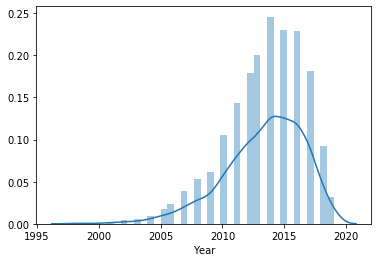

In [152]:
sns.distplot(df["Year"])
plt.show()

In [153]:
df["Year"].describe()

count    6019.000000
mean     2013.358199
std         3.269742
min      1998.000000
25%      2011.000000
50%      2014.000000
75%      2016.000000
max      2019.000000
Name: Year, dtype: float64

#### soal no 4
- Berapa banyak mobil yang memiliki total jarak pemakaian di bawah 100.000 kilometer?


In [154]:
under_100k = len(df[df["Kilometers_Driven"]<100000])
print("jumlah mobil dibawah 100k km adalah: under_100k: ", under_100k, "unit mobil")

jumlah mobil dibawah 100k km adalah: under_100k:  5470 unit mobil


#### soal no 5
- Pada batas berapa kilometer total jarak pemakaian bisa dikategorikan sebagai rendah atau tinggi?


In [155]:
cat = pd.qcut(df["Kilometers_Driven"], 3).values.categories
print(f"rendah = {cat[0]}")
print(f"tinggi = {cat[-1]}")

rendah = (170.999, 40318.0]
tinggi = (65278.0, 6500000.0]


#### soal no 6
- Apakah terdapat outlier pada kolom Kilometers_Driven? Sertakan argumen yang mendukung jawaban.


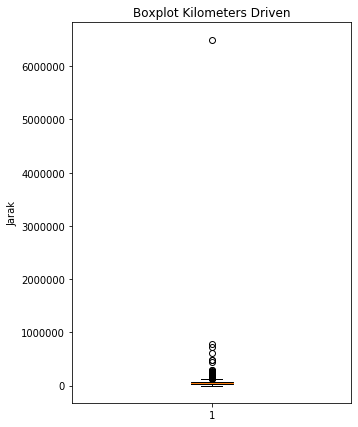

In [156]:
plt.figure(figsize=(5, 7))
plt.title("Boxplot Kilometers Driven")
plt.ylabel("Jarak")
plt.boxplot(df["Kilometers_Driven"])
plt.show()

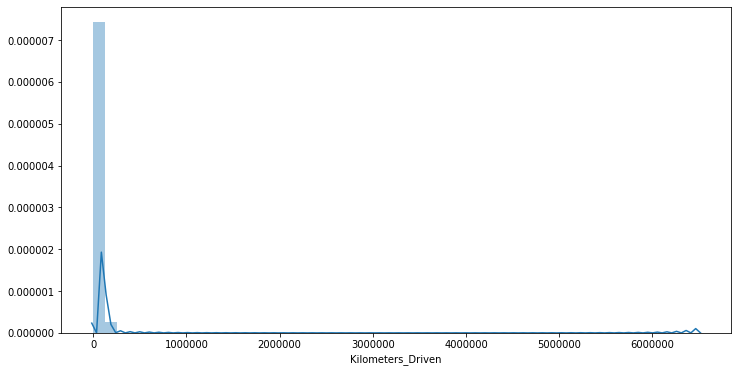

In [157]:
plt.figure(figsize=(12,6))
sns.distplot(df["Kilometers_Driven"])

#### soal no 7
- Apakah tahun pembuatan mobil berpengaruh terhadap total jarak pemakaian? Sertakan argumen yang mendukung jawaban.


berdasarkan box plot atau dengan metode iqr terdapat beberapa outlier. 
namun outlier paling extreme terdapat di angka 6.500.000

In [159]:
df[["Year", "Kilometers_Driven"]].corr()

,Year,Kilometers_Driven
Year,1.000000,-0.173048
Kilometers_Driven,-0.173048,1.000000


In [160]:
df[df["Name"]=="BMW X5 xDrive 30d M Sport"]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand
2328,BMW X5 xDrive 30d M Sport,Chennai,2017,6500000,Diesel,Automatic,First,15.97 kmpl,2993 CC,258,5.0,65.0,BMW
4101,BMW X5 xDrive 30d M Sport,Chennai,2016,45000,Diesel,Automatic,First,15.97 kmpl,2993 CC,258,5.0,57.0,BMW
5740,BMW X5 xDrive 30d M Sport,Chennai,2017,21000,Diesel,Automatic,Second,15.97 kmpl,2993 CC,258,5.0,55.0,BMW


In [161]:
df["Kilometers_Driven"] = df["Kilometers_Driven"].replace(df["Kilometers_Driven"].max(), 65000)
# Karena hampir tidak mungkin mobil keluaran 2017 tapi sudah berjalan 6 juta km. maka kami asumsikan terdapat kesalahan ketik. dan kami ganti menjadi 65000

In [162]:
df[["Year", "Kilometers_Driven"]].corr()

,Year,Kilometers_Driven
Year,1.000000,-0.448435
Kilometers_Driven,-0.448435,1.000000


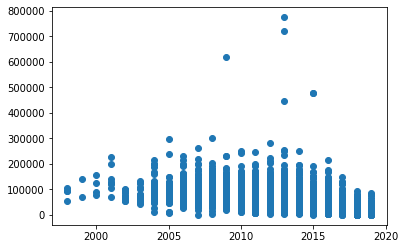

In [163]:
plt.scatter(df["Year"],df["Kilometers_Driven"])

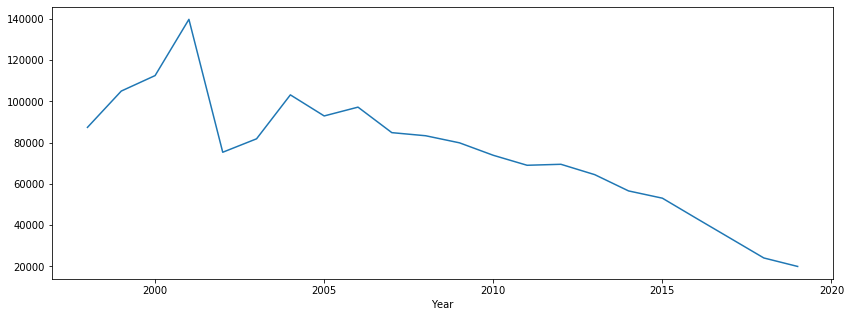

In [164]:
plt.figure(figsize=(14,5))
df.groupby("Year")["Kilometers_Driven"].mean().plot()

#### soal no 8
- Berapa banyak mobil yang merupakan kepemilikan ketiga atau lebih?


In [166]:
df["Owner_Type"].value_counts()

First             4929
Second             968
Third              113
Fourth & Above       9
Name: Owner_Type, dtype: int64

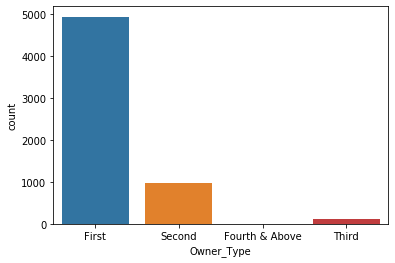

In [167]:
sns.countplot(df["Owner_Type"])

In [174]:
jml_ot = len(df[(df["Owner_Type"]!="First") & (df["Owner_Type"]!="Second")])
print("jumlah mobil yang bukan tipe First and Second Owner: ",jml_ot)

jumlah mobil yang bukan tipe First and Second Owner:  122


#### soal no 9
- Tipe bahan bakar apa yang memiliki mileage (konsumsi bahan bakar) paling hemat?


In [177]:
df["Mil_num"] = df["Mileage"].apply(lambda x: float(x.split(" ")[0]))
df["Mil_met"] = df["Mileage"].apply(lambda x: str(x.split(" ")[1]))
# because 1 kg equal to 1 liter. so theres no need adjustment

In [178]:
df.groupby("Fuel_Type")["Mil_num"].mean().sort_values(ascending=False)
# The most effecient fuel type is CNG

Fuel_Type
CNG         25.418036
LPG         19.385000
Diesel      18.620484
Petrol      17.415204
Electric    17.000000
Name: Mil_num, dtype: float64

#### soal no 10
- Apa saja faktor-faktor yang mempengaruhi harga mobil bekas di India? Sertakan argumen yang mendukung jawaban.

In [136]:
pow_mod = df["Power"].mode()[0]
df["Power"] = df["Power"].replace("null", pow_mod)

In [137]:
# Handling numerical features
df["Engine"] = df["Engine"].apply(lambda x:float(x.split(" ")[0]))
df["Power"] = df["Power"].apply(lambda x: float(x.split(" ")[0]))

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6019 non-null   object 
 8   Engine             6019 non-null   float64
 9   Power              6019 non-null   float64
 10  Seats              6019 non-null   float64
 11  Price              6019 non-null   float64
 12  Brand              6019 non-null   object 
 13  Mil_num            6019 non-null   float64
 14  Mil_met            6019 non-null   object 
dtypes: float64(5), int64(2), object(8)
memory usage: 705.5+ KB


In [183]:
df.drop(["Mileage", "Mil_met"], axis=1).to_csv("tableau.csv")

In [184]:
# handling categorical features
df_train = df.drop(["Name", "Mileage", "Mil_met"], axis=1)

In [214]:
df_train.replace("null", np.nan, inplace=True)
df_train.isna().sum()

In [220]:
mean_power = df_train[df_train["Power"] != "null"]["Power"].apply(lambda x: float(x)).mean()
df_train["Power"] = df_train["Power"].fillna(mean_power)

In [221]:
df_train["Power"] = df_train["Power"].apply(lambda x: float(x))

df_train["Transmission"] = df_train["Transmission"].map({"Manual":0,
                             "Automatic":1})

df_train["Owner_Type"] = df_train["Owner_Type"].map({
    "First":1, "Second":2, "Third":3, "Fourth & Above":4
})
df_train["Engine"] = df_train["Engine"].apply(lambda x:float(x.split(" ")[0]))

In [222]:
le = LabelEncoder()
df_train["Location"] = le.fit_transform(df_train["Location"])
df_train["Fuel_Type"] = le.fit_transform(df_train["Fuel_Type"])
df_train["Brand"] = le.fit_transform(df_train["Brand"])

#### Pearson Correlation

Text(0, 0.5, 'Nilai Pearson Correlation')

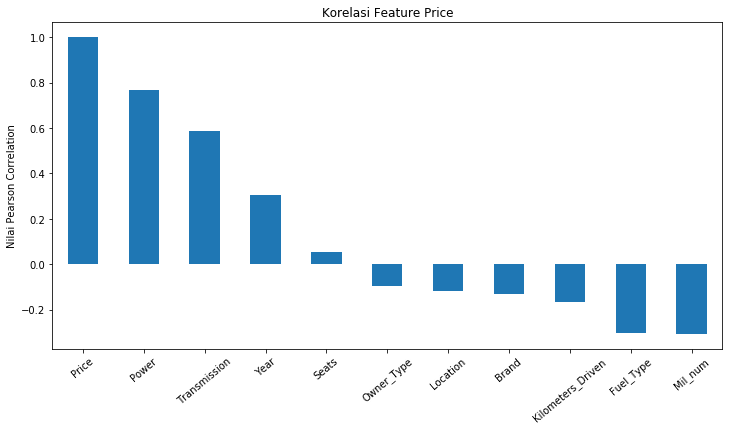

In [223]:
plt.figure(figsize=(12,6))
df_train.corr()["Price"].sort_values(ascending=False).plot(kind="bar")
plt.xticks(rotation=40)
plt.title("Korelasi Feature Price")
plt.ylabel("Nilai Pearson Correlation")
# Secara sekilas Power merupakan feature yang paling berpengaruh terhadap harga

In [238]:
x = df_train.drop("Price", axis=1)
y = df_train["Price"]
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state= 101)

#### Decission Tree Regressor

In [240]:
dt = DecisionTreeRegressor(random_state= 101)

In [241]:
dt.fit(x_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=101, splitter='best')

In [242]:
print("RMSE: ",np.sqrt(mean_squared_error(y_test, dt.predict(x_test))))
print("MAE: ",np.sqrt(mean_absolute_error(y_test, dt.predict(x_test))))
print("r2 score: ", r2_score(y_test, dt.predict(x_test)))

RMSE:  6.304080224353356
MAE:  1.5276868928301104
r2 score:  0.657532426105541


In [243]:
# # export the decision tree to a tree.dot file 
# # for visualizing the plot easily anywhere 
# import pydotplus
# dot_data = export_graphviz(dt, out_file=None)
# # using the graph_from_dot_data to visualize the tree formed by the regressor
# graph = pydotplus.graph_from_dot_data(dot_data)
# graph.write_pdf("tree.pdf")

Text(0, 0.5, 'Importance Value')

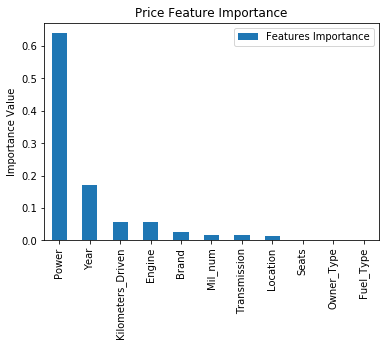

In [244]:
df_imp = pd.DataFrame([dict(zip(x_train.columns, dt.feature_importances_))]).T
df_imp = df_imp.rename({0:"Features Importance"}, axis=1)
df_imp.sort_values("Features Importance", ascending= False).plot(kind="bar")
plt.title("Price Feature Importance")
plt.xticks(rotation=90)
plt.ylabel("Importance Value")

#### Linear Regression

In [247]:
scaler = StandardScaler()
x_std = pd.DataFrame(scaler.fit_transform(x), columns= x.columns)
x_train, x_test, y_train, y_test = train_test_split(x_std, y, random_state= 101)

In [248]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [249]:
print("RMSE: ",np.sqrt(mean_squared_error(y_test, lr.predict(x_test))))
print("MAE: ",np.sqrt(mean_absolute_error(y_test, lr.predict(x_test))))
print("r2 score: ", r2_score(y_test, lr.predict(x_test)))

RMSE:  6.06424420241558
MAE:  1.9446386741251507
r2 score:  0.6830948054349733


In [250]:
print(lr.coef_)
print(lr.score(x_std, y))

[-0.62909339  2.89152825 -0.91171681 -1.38652273  1.14718282  0.0111454
  0.42149704  6.82232104 -0.70822943 -0.04802021 -0.79994565]
0.6999620326923798
